## Objective 1

In this notebook we tackle the first objective outlined in this project, compare the platforms Xbox 360 and Wii by evaluation of regional sales. This will be completed using data visualisation, the figures created can then be produced and used as part of any necessary reporting. To begin the preprocessed data is split into two distinct dataframes, one containing all games released on Xbox 360 and the other containing all games released on Wii.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data
data = pd.read_csv("../data/processed/vgsales_processed.csv")

In [3]:
# Create dataframes for Xbox 360 and Wii
Xbox360 = data[data['Platform'] == 'X360'].reset_index()
Xbox360 = Xbox360.drop(labels='index', axis=1)
Wii = data[data['Platform'] == 'Wii'].reset_index()
Wii = Wii.drop(labels='index', axis=1)

# Look at the number of observations of the new dataframes
print(Xbox360.shape, Wii.shape)

(1265, 11) (1325, 11)


It can be seen above that the sample sizes for these platforms are similar which means that conducting such an analysis is acceptable. The below pie charts show the percentage of how many games were sold in each year on each platform.

In [72]:
# Extract the percentage of the total number of games sold in each year for Xbox 360
Xbox_by_year = np.array(Xbox360.groupby("Year")["Name"].count())
Xbox_labels = np.sort(Xbox360["Year"].unique())
totalx = Xbox_by_year.sum()
percx = [(100*(Xbox_by_year[i]/totalx)).round(2) for i in range(len(Xbox_by_year))]
xcent = list(map("{}%".format, percx))

# Extract the percentage of the total number of games sold in each year for Wii
Wii_by_year = np.array(Wii.groupby("Year")["Name"].count())
Wii_labels = np.sort(Wii["Year"].unique())
totalw = Wii_by_year.sum()
percw = [(100*(Wii_by_year[i]/totalw)).round(2) for i in range(len(Wii_by_year))]
wcent = list(map("{}%".format, percw))

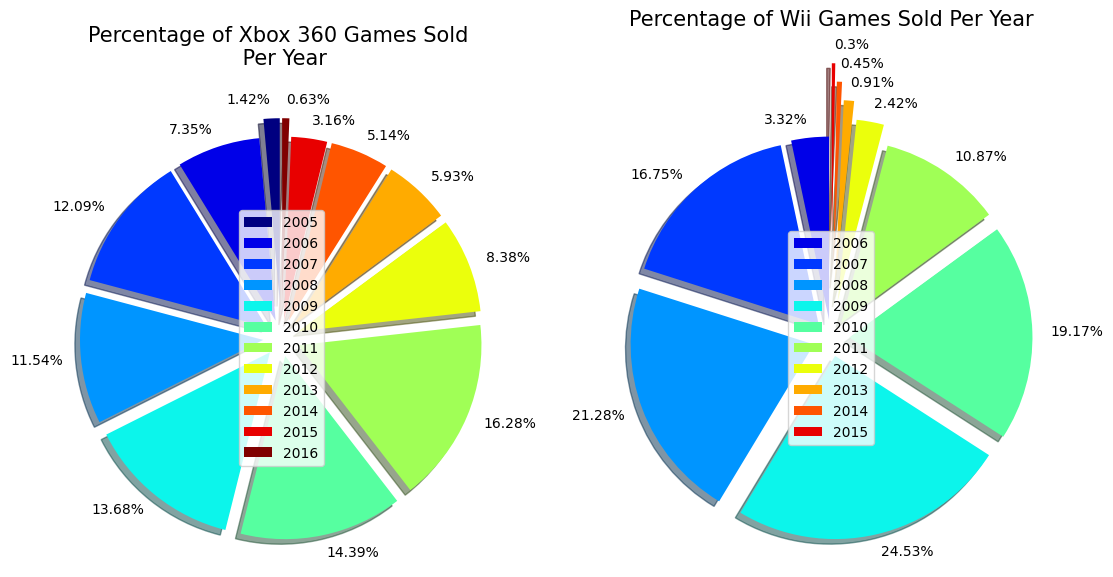

In [81]:
## Creating pie charts
fig, ax = plt.subplots(1,2, figsize=(13,8))
colours = plt.cm.jet(np.linspace(0, 1, 12))

# Pie chart for Xbox 360
explodex = (0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2)
ax[0].pie(Xbox_by_year, explode=explodex, labels = xcent, shadow=True, startangle=90, colors=colours)
ax[0].legend(Xbox_labels, loc=10)
ax[0].set_title("Percentage of Xbox 360 Games Sold \n Per Year", fontsize=15, pad=32)

# Pie chart for Wii
explodew = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5)
ax[1].pie(Wii_by_year, explode=explodew, labels = wcent, shadow=True, startangle=90, colors=colours[1:])
ax[1].legend(Wii_labels, loc=10)
ax[1].set_title("Percentage of Wii Games Sold Per Year", fontsize=15, pad=60)

plt.savefig("../reports/figures/Percentage Pie Charts.png")
plt.show()

The above shows that no games for the years 2005 and 2016 had more than 100,000 sales for the Wii platform. The fact that the Wii was released in 2006 explains why there are no games for 2005. However, for the year 2016, the reason behind why no games reached this number of sales remains a mystery. 

We now extract the information we need to compare the sales for the two platforms across different regions. We begin by considering the sales in North America. Before any conclusions are made, figures for all regions in the dataset will be produced for ease.

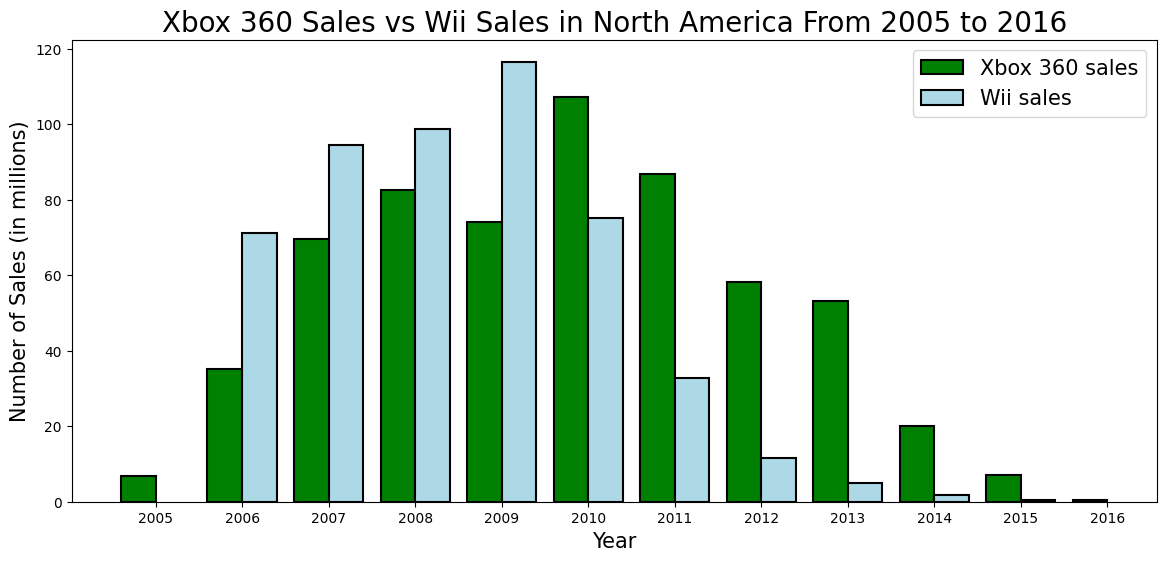

In [77]:
# List of yearly sales in North America for the Xbox 360
NA_values_Xbox = [Xbox360[Xbox360["Year"] == year]["NA_Sales"].sum() for year in Xbox_labels]

# List of yearly sales in North America for the Wii
NA_values_Wii = [Wii[Wii["Year"] == year]["NA_Sales"].sum() for year in Wii_labels]

# Plot a bar chart for the sales in North America
fig, ax = plt.subplots(figsize=(14,6))

barwidth = 0.4
ax.bar(Xbox_labels-0.2, NA_values_Xbox, width=barwidth, label="Xbox 360 sales", 
       edgecolor = "black", linewidth=1.5, color="g")
ax.bar(Wii_labels+0.2, NA_values_Wii, width=barwidth, label="Wii sales",
       edgecolor = "black", linewidth=1.5, color="lightblue")
ax.legend(fontsize=15)
ax.set_title("Xbox 360 Sales vs Wii Sales in North America From 2005 to 2016", 
             fontsize=20)
plt.xticks(Xbox_labels)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Number of Sales (in millions)", fontsize=15)

plt.savefig("../reports/figures/Sales in North America.png")
plt.show()

We now do the same as above but for sales in Europe, Japan and globally. 

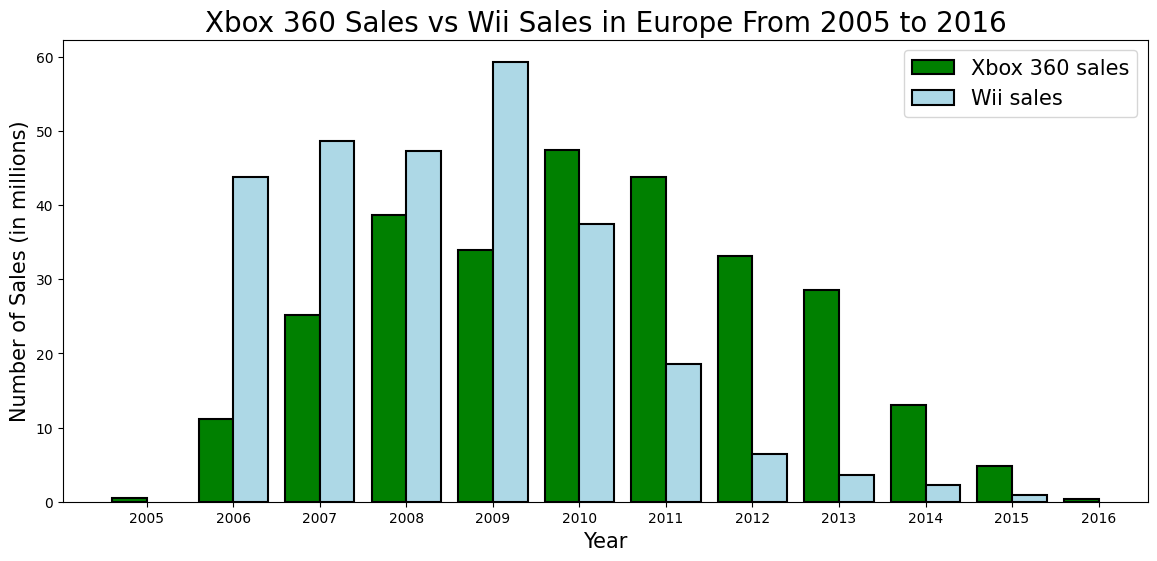

In [78]:
# List of yearly sales in Europe for the Xbox 360
EU_values_Xbox = [Xbox360[Xbox360["Year"] == year]["EU_Sales"].sum() for year in Xbox_labels]

# List of yearly sales in Europe for the Wii
EU_values_Wii = [Wii[Wii["Year"] == year]["EU_Sales"].sum() for year in Wii_labels]

# Plot a bar chart for the sales in Europe
fig, ax = plt.subplots(figsize=(14,6))

barwidth = 0.4
ax.bar(Xbox_labels-0.2, EU_values_Xbox, width=barwidth, label="Xbox 360 sales", 
       edgecolor = "black", linewidth=1.5, color="g")
ax.bar(Wii_labels+0.2, EU_values_Wii, width=barwidth, label="Wii sales",
       edgecolor = "black", linewidth=1.5, color="lightblue")
ax.legend(fontsize=15)
ax.set_title("Xbox 360 Sales vs Wii Sales in Europe From 2005 to 2016", 
             fontsize=20)
plt.xticks(Xbox_labels)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Number of Sales (in millions)", fontsize=15)

plt.savefig("../reports/figures/Sales in Europe.png")
plt.show()

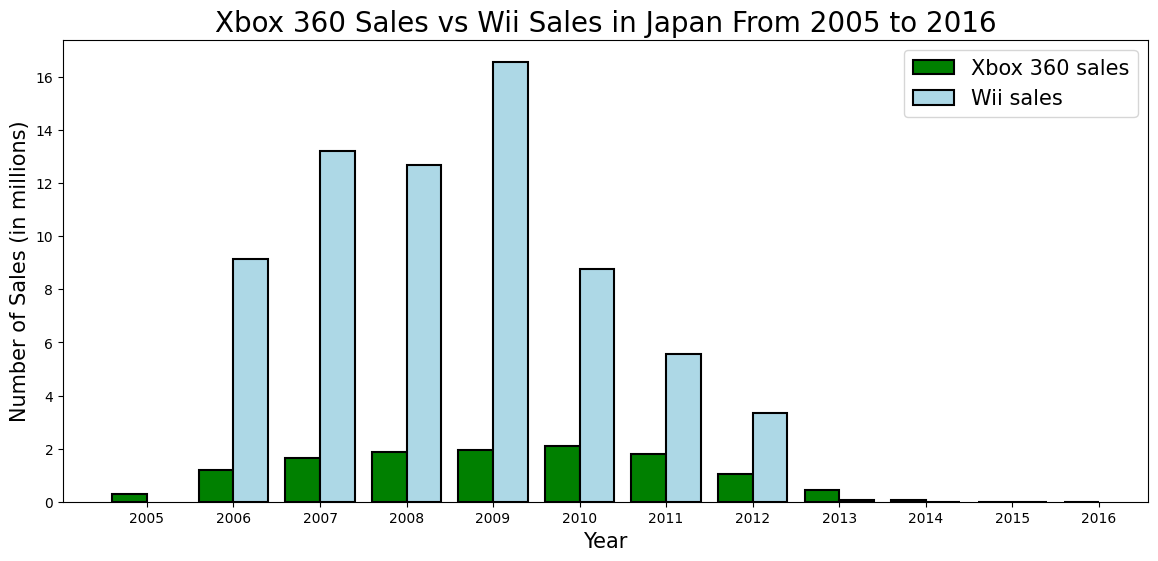

In [79]:
# List of yearly sales in Japan for the Xbox 360
JP_values_Xbox = [Xbox360[Xbox360["Year"] == year]["JP_Sales"].sum() for year in Xbox_labels]

# List of yearly sales in Japan for the Wii
JP_values_Wii = [Wii[Wii["Year"] == year]["JP_Sales"].sum() for year in Wii_labels]

# Plot a bar chart for the sales in Japan
fig, ax = plt.subplots(figsize=(14,6))

barwidth = 0.4
ax.bar(Xbox_labels-0.2, JP_values_Xbox, width=barwidth, label="Xbox 360 sales", 
       edgecolor = "black", linewidth=1.5, color="g")
ax.bar(Wii_labels+0.2, JP_values_Wii, width=barwidth, label="Wii sales",
       edgecolor = "black", linewidth=1.5, color="lightblue")
ax.legend(fontsize=15)
ax.set_title("Xbox 360 Sales vs Wii Sales in Japan From 2005 to 2016", 
             fontsize=20)
plt.xticks(Xbox_labels)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Number of Sales (in millions)", fontsize=15)

plt.savefig("../reports/figures/Sales in Japan.png")
plt.show()

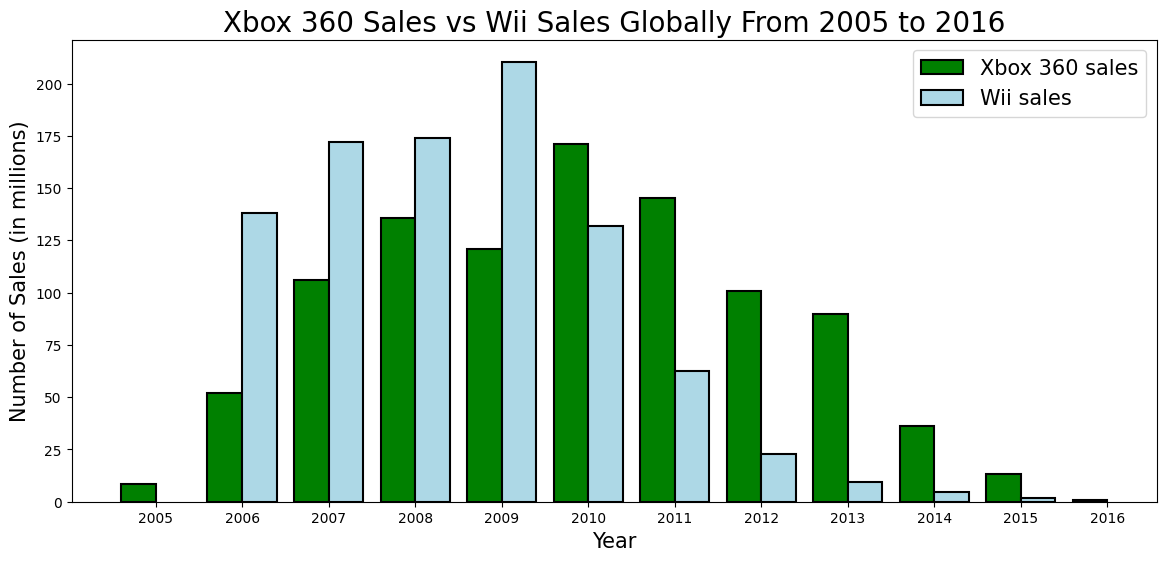

In [80]:
# List of yearly sales globally for the Xbox 360
Gl_values_Xbox = [Xbox360[Xbox360["Year"] == year]["Global_Sales"].sum() for year in Xbox_labels]

# List of yearly sales globally for the Wii
Gl_values_Wii = [Wii[Wii["Year"] == year]["Global_Sales"].sum() for year in Wii_labels]

# Plot a bar chart for sales globally
fig, ax = plt.subplots(figsize=(14,6))

barwidth = 0.4
ax.bar(Xbox_labels-0.2, Gl_values_Xbox, width=barwidth, label="Xbox 360 sales", 
       edgecolor = "black", linewidth=1.5, color="g")
ax.bar(Wii_labels+0.2, Gl_values_Wii, width=barwidth, label="Wii sales",
       edgecolor = "black", linewidth=1.5, color="lightblue")
ax.legend(fontsize=15)
ax.set_title("Xbox 360 Sales vs Wii Sales Globally From 2005 to 2016", 
             fontsize=20)
plt.xticks(Xbox_labels)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Number of Sales (in millions)", fontsize=15)

plt.savefig("../reports/figures/Sales Globally.png")
plt.show()

### Conclusion

As expected, global sales for both platforms are considerably higher than the sales for the individual regions. This is clearly due to the fact that sales for each region are collected and included in the global sales. 

Looking at the regional graphs above, we can see that the sales for Xbox 360 and Wii games are much higher in North America than they are in Europe or Japan. We can also see that the region with the fewest sales for both platforms was Japan. This could be explained by the difference in the size of the populations of these regions - North America and Europe have much larger population than Japan does. 

There is somewhat of a trend found within the sales for the Xbox 360 and the Wii games. For the years 2006-2009, more games sold for the Wii than for the Xbox 360 in North America, Europe and globally. However, from 2010 onwards the Xbox 360 clearly became the dominant platform for sales. This is likely due to the fact that the Wii was released in 2006 and is a different style of platform to the Xbox 360 which uses different technology, such as motion sensors. When the Wii was released it was the first platform of its kind, offering a unique gaming experience. For this reason the platform was hugely popular and in high demand on release. Perhaps over the years this novelty has dwindled, leading to the more traditional gaming platforms, such as the Xbox 360, generating more sales. Moreover, in the year 2010 the Xbox 360 platform adopted and improved the technology of the Wii when the Xbox Kinect was released. As a result, the Xbox 360 now offered the same experience first introduced by the Wii, only with improved graphics and gameplay. 

In Japan, the story is different. The Wii has consistently been the more popular platform over time. After all, the Wii was developed by the japanese company Nintendo with a track record of immensely popular consoles and games in the region, which most likely explains the steady sales figures over time. Also, some games within the dataset are released exclusively in a specific region. Certainly it would be more likely that more Wii games exclusive to Japan are released because it is known that these games perform well in this region.  

As time goes on, both platforms have fewer sales data. This will be due to newer more advanced platforms being released and games no longer being developed for these platforms.